# Stock Market Prediction using Numerical and Textual Analysis
**TASK** : Create a hybrid model for stock price/performance prediction
using numerical analysis of historical stock prices, and sentimental analysis of
news headlines<br><br>
● Stock to analyze and predict - SENSEX (S&P BSE SENSEX)<br><br>
**Data Sources**<br>
● Historical stock prices from finance.yahoo.com<br>
● Textual (news) data from https://bit.ly/36fFPI6

# Import libraries 

In [3]:
%pylab inline
import pandas as pd
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

Populating the interactive namespace from numpy and matplotlib


# Load Dataset  ( News Data )

In [4]:
news = pd.read_csv('news_headlines.csv')

news.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [5]:
news.rename(columns={ 'publish_date':'Date'}, inplace=True)
news.columns

Index(['Date', 'headline_category', 'headline_text'], dtype='object')

In [6]:
news.shape

(3297172, 3)

<br> getting year, month and day in separate columns 

In [7]:
news['year'] = [ int(str(x)[:4]) for x in news['Date'] ]
news['month'] = [ int(str(x)[4:6]) for x in news['Date'] ]
news['day'] = [ int(str(x)[-2:]) for x in news['Date'] ]

news.head()

,Date,headline_category,headline_text,year,month,day
0,20010101,sports.wwe,win over cena satisfying but defeating underta...,2001,1,1
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...,2001,1,2
2,20010102,unknown,Fissures in Hurriyat over Pak visit,2001,1,2
3,20010102,unknown,America's unwanted heading for India?,2001,1,2
4,20010102,unknown,For bigwigs; it is destination Goa,2001,1,2


In [8]:
news['year'] = [ str(x) for x in news['year']]
news['month'] = [ str(x) for x in news['month']]
news['day'] = [ str(x) for x in news['day']]

news['Date'] = news['year'] +'-'+ news['month'] +'-'+ news['day']

news.head()

,Date,headline_category,headline_text,year,month,day
0,2001-1-1,sports.wwe,win over cena satisfying but defeating underta...,2001,1,1
1,2001-1-2,unknown,Status quo will not be disturbed at Ayodhya; s...,2001,1,2
2,2001-1-2,unknown,Fissures in Hurriyat over Pak visit,2001,1,2
3,2001-1-2,unknown,America's unwanted heading for India?,2001,1,2
4,2001-1-2,unknown,For bigwigs; it is destination Goa,2001,1,2


<br> now we have Date in Datetime format. we can simply use to_datetime() functionality of pandas.

In [17]:
news['Date'] = pd.to_datetime(news['Date'])

In [11]:
news.dtypes

Date                 datetime64[ns]
headline_category            object
headline_text                object
year                         object
month                        object
day                          object
dtype: object

<br>**year-wise news articles**

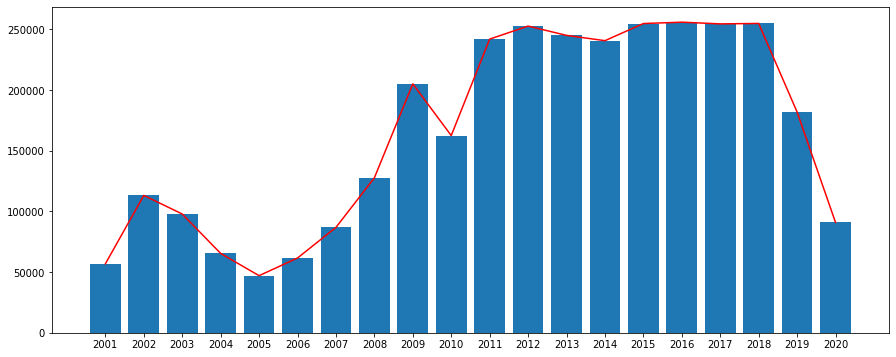

In [14]:
year_wise = pd.DataFrame(news.groupby('year')['headline_text'].count())

plt.figure(figsize(15,6))
plt.bar(x = year_wise.index, height = year_wise['headline_text'])
plt.xticks(year_wise.index)
plt.plot(year_wise['headline_text'], color='red')

second decade has much higher articles published as compared to first decade, surely because of increase in electronic media.

<br>**month-wise news articles**

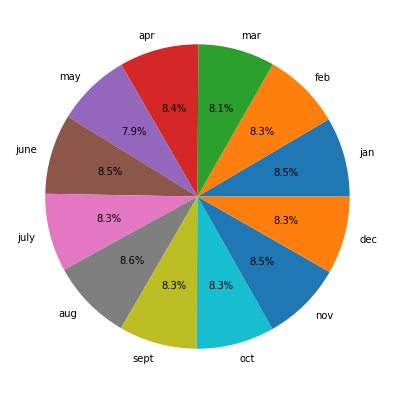

In [15]:
month_wise = pd.DataFrame(news.groupby('month')['headline_text'].count())

labels = ['jan', 'feb', 'mar','apr','may','june', 'july', 'aug', 'sept', 'oct', 'nov','dec']

plt.figure(figsize=(7,7))
plt.pie(month_wise['headline_text'], labels= labels, autopct='%1.1f%%' )
plt.show()

almost every month has equal number of articles published.

# Sentiment Analysis of News headlines using "VADER Sentiment Analysis"\

VADER (Valence Aware Dictionary and sEntiment Reasoner)
is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media.
<br>
VADER not only tells about the Positivity and Negativity score but also tells us about how positive or negative a sentiment is.

In [13]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

def sentiment_analysis(text):                  
    sentiment = sia.polarity_scores(text)
    return sentiment


if compound>0.2, labelling it as positive (1)<br>
if compound<-0.2; negative   (-1) <br>
and if  0.2 <= compound <= -0.2;  neutral  (0)

In [ ]:
for i in range( len(news['headline_text']) ):
    Dict = sentiment_analysis( news['headline_text'][i] )
  

    news['negative']=Nan
    news['neutral']=Nan
    news['positive']=Nan
    news['compound']=Nan
    news['sentiment']=Nan
    
    
    news['negative'][i] = Dict['neg']
    news['positive'][i] = Dict['pos']
    news['neutral'][i] = Dict['neu']
    news['compound'][i] = Dict['compound']
  

    if Dict['compound'] >= 0.2:
        news['sentiment'][i] = 1                        # 1 : positive
    elif Dict['compound'] <= -0.2:
        news['sentiment'][i] = -1                       # -1 : negative
    else:
        news['sentiment'][i] = 0                        # 0 : neutral


In [15]:
news.head()

,Date,headline_category,headline_text,year,month,day,positive,negative,neutral,compound,sentiment
0,2001-01-01,sports.wwe,win over cena satisfying but defeating underta...,2001,1,1,0.297,0.230,0.473,-0.0000,0.0
1,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...,2001,1,2,0.195,0.000,0.805,0.2924,1.0
2,2001-01-02,unknown,Fissures in Hurriyat over Pak visit,2001,1,2,0.000,0.000,1.000,0.0000,0.0
3,2001-01-02,unknown,America's unwanted heading for India?,2001,1,2,0.000,0.322,0.678,-0.2263,-1.0
4,2001-01-02,unknown,For bigwigs; it is destination Goa,2001,1,2,0.000,0.000,1.000,0.0000,0.0


In [18]:
news.dtypes

Date                 datetime64[ns]
headline_category            object
headline_text                object
year                          int64
month                         int64
day                           int64
positive                    float64
negative                    float64
neutral                     float64
compound                    float64
sentiment                   float64
dtype: object

# SENSEX dataset
Load Data<br>we have 20 years of sensex data, starting from 2001-01-02 to 2020-29-06 

In [19]:
sensex  = pd.read_csv('sensex.csv')

sensex.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0
1,2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0.0
2,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.0
3,2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0.0
4,2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0.0


In [20]:
sensex.shape

(4868, 7)

In [21]:
sensex.isnull().sum()

Date          0
Open         74
High         74
Low          74
Close        74
Adj Close    74
Volume       74
dtype: int64

74 null values out of 4868 datapoints, better to drop them.

In [23]:
sensex.dropna(inplace=True)

In [24]:
sensex['Date'] = pd.to_datetime(sensex['Date'])

**subtracting sensex['Open'] from sensex['Close'], which will tell us if sensex went up or down that day.**

In [25]:
sensex['market'] = sensex['Close'] - sensex['Open']

sensex.loc[sensex['market']>0, 'market'] = 1
sensex.loc[sensex['market']<=0, 'market'] = 0

if sensex went up, i.e., >0 ( labelling as 1)<br>
if sensex went down, i.e., <=0 ( labelling as 0)

In [26]:
sensex.head()

,Date,Open,High,Low,Close,Adj Close,Volume,market
0,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0,1.0
1,2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0.0,1.0
2,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.0,0.0
3,2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0.0,1.0
4,2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0.0,0.0


In [27]:
sensex.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
market       0
dtype: int64

# performing time series analysis

In [28]:
series = sensex['Close']
time_steps = np.arange( len(series))


In [30]:
def plot_series(time, series, start=0, end=None):
    plt.plot(time[start:end], series[start:end])
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

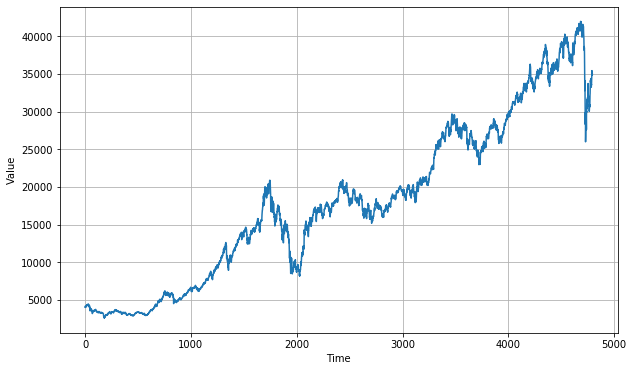

In [31]:
plt.figure(figsize=(10,6))
plot_series(time_steps, series)

length of series :  4794


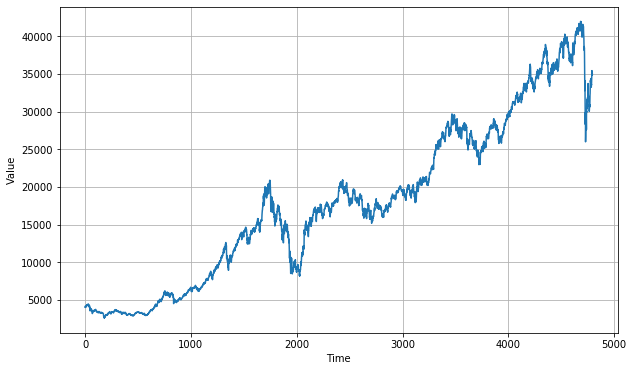

In [33]:
series = np.array(series)
time = np.array(time_steps)

plt.figure(figsize=(10,6))
plot_series(time_steps, series)

print('length of series : ',len(series))

we have 4794 time_stamps. its good to split at 4000. i.e., 4000 for training and 794 for validation

In [34]:
split_time = 4000         

x_train = series[: split_time]
time_train = time[: split_time]
x_valid = series[ split_time : ]
time_valid = time[ split_time : ]

batch_size = 32
buffer_size=2000
window_size = 22

In [35]:
def windowed_dataset(series, window_size, batch_size, buffer_size):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size+1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda w: w.batch(window_size+1))
    dataset = dataset.shuffle(buffer_size)
    dataset = dataset.map(lambda w: (w[:-1], w[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset


In [36]:
print(' length of data : ',len(series))

 length of data :  4794


In [39]:
train_set = windowed_dataset(x_train, window_size, batch_size=64, buffer_size=buffer_size)

model = tf.keras.Sequential([tf.keras.layers.Dense(20, input_shape=[window_size],  activation='relu'),
                             tf.keras.layers.Dense(10, activation='relu'),
                             tf.keras.layers.Dense(1)
                             ])


model.compile(loss = tf.keras.losses.Huber(),
              optimizer = tf.keras.optimizers.SGD(lr = 1e-7, momentum= 0.9),
              metrics = ['mae'])

history = model.fit(train_set, epochs= 200)

Epoch 1/200
63/63 [==============================] - 1s 18ms/step - loss: 3224.2507 - mae: 3224.7507
Epoch 2/200
63/63 [==============================] - 1s 9ms/step - loss: 377.1487 - mae: 377.6486
Epoch 3/200
63/63 [==============================] - 1s 8ms/step - loss: 381.4483 - mae: 381.9480
Epoch 4/200
63/63 [==============================] - 1s 9ms/step - loss: 373.5912 - mae: 374.0908
Epoch 5/200
63/63 [==============================] - 1s 8ms/step - loss: 377.4752 - mae: 377.9748
Epoch 6/200
63/63 [==============================] - 1s 10ms/step - loss: 375.9171 - mae: 376.4166
Epoch 7/200
63/63 [==============================] - 1s 9ms/step - loss: 372.9470 - mae: 373.4466
Epoch 8/200
63/63 [==============================] - 1s 10ms/step - loss: 370.8673 - mae: 371.3669
Epoch 9/200
63/63 [==============================] - 1s 10ms/step - loss: 369.8477 - mae: 370.3474
Epoch 10/200
63/63 [==============================] - 0s 7ms/step - loss: 364.6090 - mae: 365.1088
Epoch 11/200


63/63 [==============================] - 1s 11ms/step - loss: 192.1955 - mae: 192.6946
Epoch 164/200
63/63 [==============================] - 1s 9ms/step - loss: 190.2167 - mae: 190.7156
Epoch 165/200
63/63 [==============================] - 1s 11ms/step - loss: 203.4741 - mae: 203.9731
Epoch 166/200
63/63 [==============================] - 1s 8ms/step - loss: 183.0788 - mae: 183.5780
Epoch 167/200
63/63 [==============================] - 1s 11ms/step - loss: 183.7970 - mae: 184.2962
Epoch 168/200
63/63 [==============================] - 1s 12ms/step - loss: 183.2281 - mae: 183.7274
Epoch 169/200
63/63 [==============================] - 1s 9ms/step - loss: 190.1507 - mae: 190.6493
Epoch 170/200
63/63 [==============================] - 1s 9ms/step - loss: 196.1030 - mae: 196.6023
Epoch 171/200
63/63 [==============================] - 1s 10ms/step - loss: 189.4566 - mae: 189.9556
Epoch 172/200
63/63 [==============================] - 1s 10ms/step - loss: 196.2590 - mae: 196.7581: 0s - lo

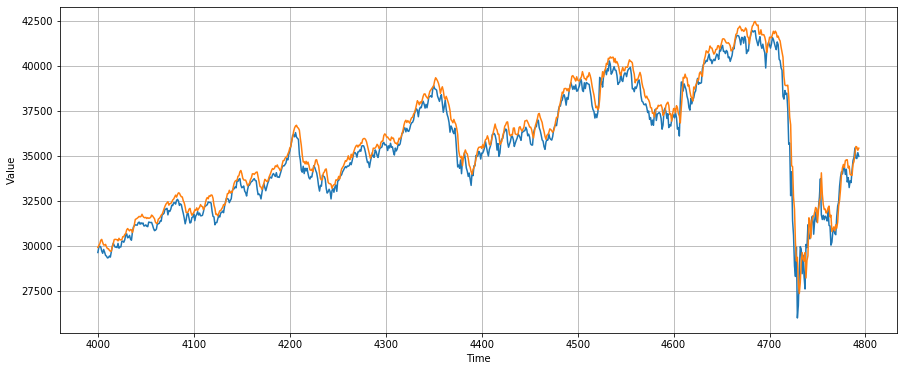

In [40]:
predictions = []

for time in range(len(series)-window_size):
    predictions.append( model.predict(series[time: time+window_size][np.newaxis]))

predictions_valid = predictions[split_time - window_size : ]
predictions_valid = np.array(predictions_valid)[: , 0,0]

plot_series(time_valid, x_valid)
plot_series(time_valid, predictions_valid)

**Zoomed predictions**

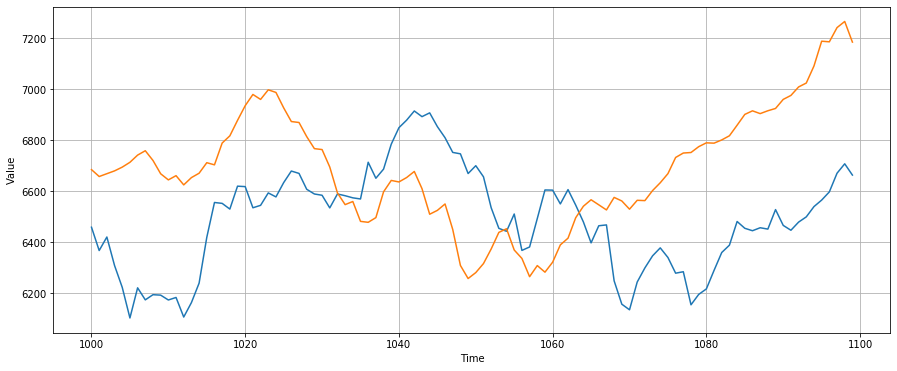

In [45]:
pred = np.array(predictions)[: , 0,0]

plot_series(time[1000:1100], series[1000:1100])
plot_series(time[1000:1100], pred[1000:1100])

# Merging 'news' and 'sensex' dataset
on 'Date' column

In [38]:
df = pd.merge(news, sensex, on='Date')

In [39]:
df.head()

,Date,headline_category,headline_text,year,month,day,positive,negative,neutral,compound,sentiment,Open,High,Low,Close,Adj Close,Volume,market
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...,2001,1,2,0.195,0.000,0.805,0.2924,1.0,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0,1.0
1,2001-01-02,unknown,Fissures in Hurriyat over Pak visit,2001,1,2,0.000,0.000,1.000,0.0000,0.0,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0,1.0
2,2001-01-02,unknown,America's unwanted heading for India?,2001,1,2,0.000,0.322,0.678,-0.2263,-1.0,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0,1.0
3,2001-01-02,unknown,For bigwigs; it is destination Goa,2001,1,2,0.000,0.000,1.000,0.0000,0.0,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0,1.0
4,2001-01-02,unknown,Extra buses to clear tourist traffic,2001,1,2,0.342,0.000,0.658,0.3818,1.0,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0,1.0


# Shuffle Dataset

In [42]:
df = df.sample(frac=1)

In [43]:
df.head()

,Date,headline_category,headline_text,year,month,day,positive,negative,neutral,compound,sentiment,Open,High,Low,Close,Adj Close,Volume,market
1398597,2015-02-16,city.mumbai,27 detected with swine flu over weekend in Mumbai,2015,2,16,0.000,0.245,0.755,-0.3818,-1.0,29170.769531,29325.349609,29083.400391,29135.880859,29135.880859,10500.0,0.0
317218,2007-02-08,city.pune,Chance to glance at Sunita's space abode today,2007,2,8,0.222,0.000,0.778,0.2500,1.0,14690.580078,14697.690430,14523.160156,14652.089844,14652.089844,11600.0,0.0
1145579,2013-07-15,city.allahabad,Govt departments shy away from blood donation,2013,7,15,0.000,0.250,0.750,-0.2500,-1.0,19926.099609,20072.439453,19883.189453,20034.480469,20034.480469,7000.0,1.0
487486,2009-03-04,city.goa,Payment of Sonsoddo bills puts MMC in a fix,2009,3,4,0.000,0.000,1.000,0.0000,0.0,8473.250000,8501.459961,8373.240234,8446.490234,8446.490234,40600.0,0.0
1845229,2017-09-21,business.international-business,St. Louis approves police body cameras ahead o...,2017,9,21,0.209,0.170,0.620,0.1298,0.0,32406.419922,32462.609375,32164.419922,32370.039063,32370.039063,8700.0,0.0


In [44]:
df.shape

(2244621, 18)

# dataset is quite large (22.5 lakhs datapoints). because of limited memory issue. we will use smaller dataset
taking 100000 rows


In [45]:

final = df.iloc[:100000 , :]

**Taking Sensex 'Open' value and Sentiments of news headlines (positive, negative, neutral)**<br>
**to predict whether Sensex will go up or down that day depending on news sentiment.**

In [47]:
x = final[['Open','positive', 'negative', 'neutral', 'compound']]
y = final['market']

Splitting train-test 

In [48]:
from sklearn.model_selection import train_test_split, GridSearchCV

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=44)

# using XGBoost Classifier and performing Grid Search to find best parameters.

In [50]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

param_grid = {
             'max_depth':[4,6,8,10],
             'n_estimators':[200,300]
             }

gscv = GridSearchCV( xgb, param_grid, verbose=2 , cv=3)

gscv.fit(x_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] max_depth=4, n_estimators=200 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=4, n_estimators=200, total=   4.1s
[CV] max_depth=4, n_estimators=200 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s remaining:    0.0s


[CV] .................... max_depth=4, n_estimators=200, total=   3.9s
[CV] max_depth=4, n_estimators=200 ...................................
[CV] .................... max_depth=4, n_estimators=200, total=   3.9s
[CV] max_depth=4, n_estimators=300 ...................................
[CV] .................... max_depth=4, n_estimators=300, total=   5.7s
[CV] max_depth=4, n_estimators=300 ...................................
[CV] .................... max_depth=4, n_estimators=300, total=   5.7s
[CV] max_depth=4, n_estimators=300 ...................................
[CV] .................... max_depth=4, n_estimators=300, total=   5.8s
[CV] max_depth=6, n_estimators=200 ...................................
[CV] .................... max_depth=6, n_estimators=200, total=  11.1s
[CV] max_depth=6, n_estimators=200 ...................................
[CV] .................... max_depth=6, n_estimators=200, total=   4.8s
[CV] max_depth=6, n_estimators=200 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  3.1min finished


GridSearchCV(cv=3, estimator=XGBClassifier(),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'n_estimators': [200, 300]},
             verbose=2)

In [51]:
print('best parameters : ',gscv.best_params_)

best parameters :  {'max_depth': 10, 'n_estimators': 300}


In [52]:
final_model = XGBClassifier(**gscv.best_params_)

final_model.fit(x_train,y_train)

XGBClassifier(max_depth=10, n_estimators=300)

In [54]:
from sklearn.metrics import classification_report, accuracy_score

In [56]:
pred = final_model.predict(x_test)

print(classification_report(pred, y_test))
print('accuracy : ', accuracy_score(pred, y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.93      0.94     16684
         1.0       0.92      0.95      0.93     13316

    accuracy                           0.94     30000
   macro avg       0.94      0.94      0.94     30000
weighted avg       0.94      0.94      0.94     30000

accuracy :  0.9391


**Conclusion:-**
Here we XGBoost Classifier, it has 93% accuracy.

Label(market) indicates that **1** for **price(Sensex) increase** and **0** for **price(Sensex) decrease**.

If a sensex will increase or decrease based on news headlines using sentiment analysis.
This model will predict if the sensex will increase or decrease based on the sentiment of top news article headlines on that day.

In [ ]:
####################################################################################